In [103]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [105]:
# from sklearn.preprocessing import 

In [106]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("Test_Jan.csv")
df_y_test = pd.read_csv("Predict_Jan.csv")

In [107]:
df_test = df_test.drop(["nat_demand"],axis=1)
df_test = df_test.join(df_y_test.set_index("datetime"), on="datetime")

In [108]:
x_train = df_train.drop(["nat_demand","datetime"], axis=1).copy()
Y_train = df_train["nat_demand"].astype(np.float32).copy()

In [109]:
x_test = df_test.drop(["nat_demand","datetime"], axis=1).copy()
Y_test = df_test["nat_demand"].astype(np.float32).copy()

In [110]:
df_train

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,03-01-2015 01:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,03-01-2015 02:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,03-01-2015 03:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,03-01-2015 04:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,03-01-2015 05:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43770,31-12-2019 19:00,1301.6065,26.635645,0.018421,0.013165,13.184052,25.135645,0.018048,0.064240,3.086798,23.620020,0.016697,0.073425,3.865351,22,1,0
43771,31-12-2019 20:00,1250.9634,26.495935,0.018162,0.014713,13.443892,24.769373,0.017781,0.058838,3.659980,23.284998,0.016606,0.064362,4.171572,22,1,0
43772,31-12-2019 21:00,1193.6802,26.354456,0.017980,0.013836,13.442195,24.479456,0.017606,0.038086,3.769294,23.041956,0.016492,0.054260,4.045283,22,1,0
43773,31-12-2019 22:00,1130.4575,26.166895,0.017965,0.018486,13.420656,24.112207,0.017393,0.020386,3.872397,22.862207,0.016401,0.055557,3.843736,22,1,0


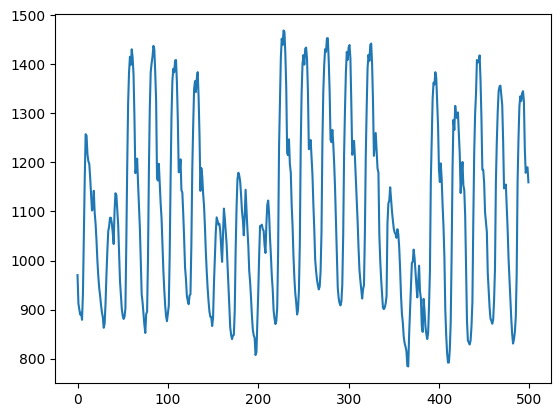

In [111]:
plt.plot(df_train["nat_demand"].iloc[:500])
plt.show()

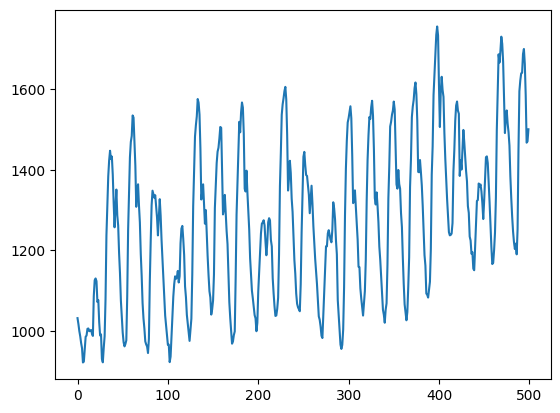

In [112]:
plt.plot(df_test["nat_demand"].iloc[:500])
plt.show()

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [114]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [115]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [116]:
# Reshape into [samples, time_steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [117]:
a = tf.data.Dataset.from_tensor_slices(tf.constant(x_train))
b = tf.data.Dataset.from_tensor_slices(tf.constant(Y_train))
train_data = tf.data.Dataset.zip((a,b))

In [118]:
a

<TensorSliceDataset element_spec=TensorSpec(shape=(1, 15), dtype=tf.float64, name=None)>

In [119]:
b

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>

In [120]:
x_train.shape

(43775, 1, 15)

In [154]:
model = Sequential()
model.add(layers.LSTM(units=128, activation='relu', return_sequences=True, input_shape = (x_train.shape[1],x_train.shape[2])))
# model.add(layers.LSTM(units=128, activation="relu", return_sequences=True))
model.add(layers.LSTM(units=64, activation="relu", return_sequences=True))
# model.add(layers.Dense(units=64, activation="linear"))
model.add(layers.Dense(units=10, activation="relu"))
model.add(layers.Dense(units=1)) # Prediction of the next value

In [159]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001))

In [160]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 1, 128)            73728     
                                                                 
 lstm_30 (LSTM)              (None, 1, 64)             49408     
                                                                 
 dense_27 (Dense)            (None, 1, 10)             650       
                                                                 
 dense_28 (Dense)            (None, 1, 1)              11        
                                                                 
Total params: 123,797
Trainable params: 123,797
Non-trainable params: 0
_________________________________________________________________


In [161]:
model.fit(x_test,Y_test,epochs=20, batch_size=1)

Epoch 1/20
744/744 [==============================] - 8s 5ms/step - loss: 5568.4595
Epoch 2/20
744/744 [==============================] - 11s 15ms/step - loss: 5332.7905
Epoch 3/20
744/744 [==============================] - 11s 15ms/step - loss: 5252.1138
Epoch 4/20
744/744 [==============================] - 4s 6ms/step - loss: 5269.6499
Epoch 5/20
744/744 [==============================] - 7s 10ms/step - loss: 5146.1978
Epoch 6/20
744/744 [==============================] - 15s 20ms/step - loss: 5227.7866
Epoch 7/20
744/744 [==============================] - 15s 21ms/step - loss: 5140.7417
Epoch 8/20
744/744 [==============================] - 17s 23ms/step - loss: 5142.6426
Epoch 9/20
744/744 [==============================] - 7s 9ms/step - loss: 5137.8804
Epoch 10/20
744/744 [==============================] - 14s 18ms/step - loss: 5095.1479
Epoch 11/20
744/744 [==============================] - 15s 20ms/step - loss: 5057.4863
Epoch 12/20
744/744 [==============================] - 8s 1

In [162]:
y_pred = model.predict(x_test)
y_pred = y_pred.squeeze()

24/24 [==============================] - 4s 16ms/step


In [163]:
Y_test.to_numpy().shape

(744,)

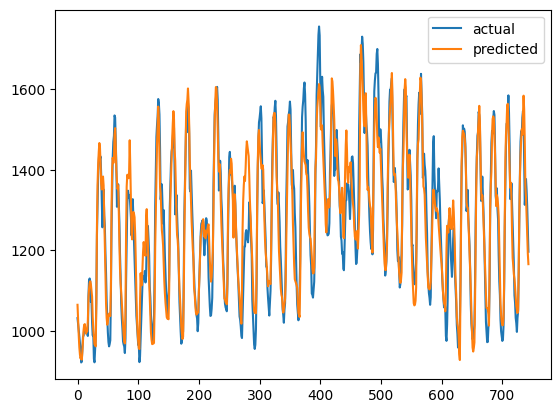

In [164]:
plt.plot(Y_test, label="actual")
plt.plot(y_pred, label="predicted")
plt.legend()
plt.show()